##Section: More comprehensive and useful examples
A more useful script to read a data file.
The format is a csv file.

In [2]:
# Read excel spreadsheets using panadas dataframes. Easier and more functionality.
import pandas as pd


datafilename = 'FakeAnimalData.csv'
data = pd.read_csv(datafilename, delimiter=',')
print(data)



# or we can use excel data directly with pandas
datafilename = 'FakeAnimalData.xlsx'

data = pd.read_excel(datafilename)
print (data)



   Rat     date        test  Ntrials  Nsuccessful
0  123  1/12/23  ladderwalk       10            8
1  456  2/12/23  ladderwalk       11            3
2  789  3/12/23  ladderwalk       12            7
   Rat       date        test  Ntrials  Nsuccessful
0  123 2023-01-12  ladderwalk       10            8
1  456 2023-02-12  ladderwalk       11            3
2  789 2023-03-12  ladderwalk       12            7


In [20]:
# The code above will cause an error if pandas is not installed.
# To install pandas, you can use the following command:
# Run this cell and re-run the one above. 
!pip install pandas openpyxl

For many functions, you can include additional arguments to change the behavior from default settings.
More about functions and how to use them for this example.
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html


In [3]:

# use dataframes to be more efficient in calculations
# add another column calculated from the other data
data["SuccessRate"] = data["Nsuccessful"] / data["Ntrials"] * 100
print(data)

MeanSuccessRate = data["SuccessRate"].mean()
print('Mean success rate is ',MeanSuccessRate)



   Rat       date        test  Ntrials  Nsuccessful  SuccessRate
0  123 2023-01-12  ladderwalk       10            8    80.000000
1  456 2023-02-12  ladderwalk       11            3    27.272727
2  789 2023-03-12  ladderwalk       12            7    58.333333
Mean success rate is  55.2020202020202


## Here is some real data from the behavioral core:

In [4]:
# first just use the default settings to load the excel file
datafilename = 'Sterrett 10.5.2021-1.5.2022 SCP-1 3 Dose WT Male & Female Tetrad.xlsx'

data = pd.read_excel(datafilename)
print (data) #note we have name NaN data and it didn't capture the correct row/headers for our data.

       Sex   Animal Treatment         DOB Drug Creation Date Date Tested   \
0   Female       87      WT-A    9.4.2021     12.14.2021 CJH   12.14.2021   
1   Female  BQ472 2      WT-A   9.14.2021     12.14.2021 CJH   12.14.2021   
2   Female  BQ472 5      WT-A   9.14.2021     12.14.2021 CJH   12.14.2021   
3   Female  BF482 3      WT-A   9.15.2021     12.14.2021 CJH   12.14.2021   
4   Female      CGN      WT-A   10.2.2021        1.3.2022 AD     1.4.2022   
5   Female      CGN      WT-A   10.2.2021        1.3.2022 AD     1.4.2022   
6   Female      140      WT-A   10.4.2021        1.3.2022 AD     1.4.2022   
7   Female      156      WT-A  10.11.2021        1.3.2022 AD     1.4.2022   
8   Female      111      WT-A   9.21.2021        1.3.2022 AD     1.5.2021   
9   Female  BY435 1      WT-A  10.13.2021        1.3.2022 AD     1.5.2021   
10  Female       88      WT-B    9.4.2021     12.14.2021 CJH   12.14.2021   
11  Female  BQ472 3      WT-B   9.14.2021     12.14.2021 CJH   12.14.2021   

In [5]:
groupeddata = data.groupby('Sex')
average_bySex = groupeddata.mean(numeric_only=True)
print('Means')
print(average_bySex)
std_bySex = groupeddata.std(numeric_only=True)
print('Standard Deviations')
print(std_bySex)

Means
         Distance  Mean speed  Time freezing  Time mobile  Time immobile  \
Sex                                                                        
Female  39.149633    0.043400     151.083333   545.746667     354.253333   
Male    39.409867    0.043733     105.253333   571.823333     328.176667   

        Inner Zone : entries  Inner Zone : time  Inner Zone : distance  \
Sex                                                                      
Female            167.466667         551.523333              27.514433   
Male              166.500000         511.000000              25.467933   

        Inner Zone : average speed  Inner Zone : max visit  ...  \
Sex                                                         ...   
Female                    0.050200               61.803333  ...   
Male                      0.049067               52.886667  ...   

        Outer Zone : average speed  Outer Zone : max visit  \
Sex                                                          

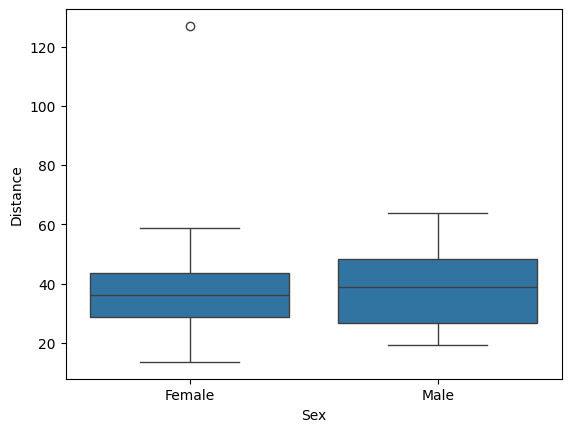

In [6]:
## quick box plotting.
# googled for "python box plot by group"
# https://www.geeksforgeeks.org/grouped-boxplots-in-python-with-seaborn/
!pip install seaborn

import seaborn as sns

# create grouped boxplot
ax = sns.boxplot(y = data['Distance'],
              x = data['Sex'])


Text(0.5, 0, 'Sex')

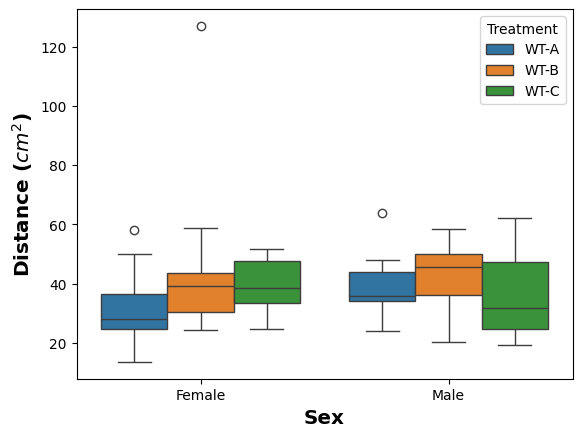

In [7]:
!pip install matplotlib

import matplotlib.pyplot as plt

ax = sns.boxplot(y = data['Distance'],
              x = data['Sex'],
              hue = data['Treatment'])

ax.set_ylabel("Distance ($cm^2$)",fontsize='x-large',fontweight='bold') #note this uses a strange $ to get the exponent to display
ax.set_xlabel("Sex",fontsize='x-large',fontweight='bold')

Text(0.5, 0, 'Treatment')

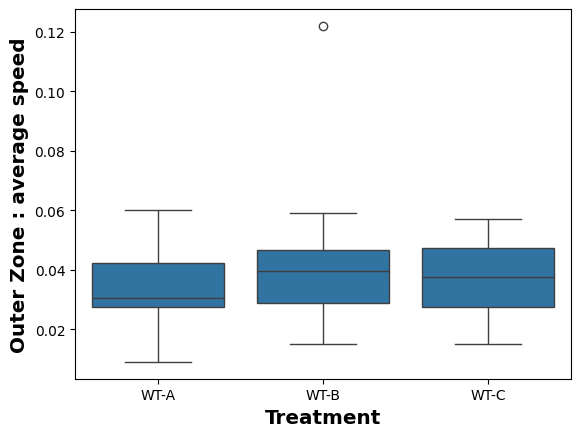

In [8]:
# prompt: plot data by treatment for outer zone time

# create grouped boxplot
ax = sns.boxplot(y = data['Outer Zone : average speed'],
              x = data['Treatment'])

ax.set_ylabel("Outer Zone : average speed",fontsize='x-large',fontweight='bold') #note this uses a strange $ to get the exponent to display
ax.set_xlabel("Treatment",fontsize='x-large',fontweight='bold')
